In [ ]:
import os
import pandas as pd
import kagglehub

# Download dataset
dataset_path = kagglehub.dataset_download("pariza/bbc-news-summary")

# Define directories
news_articles_dir = os.path.join(dataset_path, "bbc news summary", "BBC News Summary", "News Articles")
summaries_dir = os.path.join(dataset_path, "bbc news summary", "BBC News Summary", "Summaries")

if not os.path.exists(news_articles_dir) or not os.path.exists(summaries_dir):
    raise FileNotFoundError("Required directories not found.")

data = []
article_number = 1

# Iterate over categories
for category in os.listdir(news_articles_dir):
    article_category_path = os.path.join(news_articles_dir, category)
    summary_category_path = os.path.join(summaries_dir, category)

    if os.path.isdir(article_category_path):
        for filename in os.listdir(article_category_path):
            article_path = os.path.join(article_category_path, filename)
            summary_path = os.path.join(summary_category_path, filename)

            # Read article
            try:
                with open(article_path, "r", encoding="utf-8") as file:
                    article_text = file.read().strip()
            except UnicodeDecodeError:
                with open(article_path, "r", encoding="ISO-8859-1") as file:
                    article_text = file.read().strip()

            # Read summary
            try:
                with open(summary_path, "r", encoding="utf-8") as file:
                    summary_text = file.read().strip()
            except FileNotFoundError:
                summary_text = ""
            except UnicodeDecodeError:
                with open(summary_path, "r", encoding="ISO-8859-1") as file:
                    summary_text = file.read().strip()

            # Append to list
            data.append([article_number, category, article_text, summary_text])
            article_number += 1

# Create DataFrame
df = pd.DataFrame(data, columns=["Article_Number", "Category", "Article", "Summary"])

# Save to CSV
df.to_csv("bbc_news_articles_with_summaries.csv", index=False, encoding="utf-8")

print(df.head())


100%|██████████| 8.91M/8.91M [00:01<00:00, 6.10MB/s]

Extracting files...


   Article_Number  Category  \
0               1  politics   
1               2  politics   
2               3  politics   
3               4  politics   
4               5  politics   

                                             Article  \
0  Student 'fee factor' played down\n\nA rise has...   
1  Mayor will not retract Nazi jibe\n\nLondon may...   
2  Royal couple watch nation's mood\n\nPrince Cha...   
3  Concerns at school diploma plan\n\nFinal appea...   
4  Campaign 'cold calls' questioned\n\nLabour and...   

                                             Summary  
0  In June last year, Mr Wallace announced propos...  
1  London mayor Ken Livingstone has again refused...  
2  The Archbishop of Canterbury said: "I am pleas...  
3  But the government was said to be still rewrit...  
4  Assistant information commissioner Phil Jones ...  


In [ ]:
import pandas as pd
from pprint import pprint

print("Original Data Sample:")
pprint(df["Article"].head(1).tolist())

df["Lowercased"] = df["Article"].str.lower()
print("/n")
print("After Lowercasing:")
pprint(df["Lowercased"].head(1).tolist())


Original Data Sample:
["Student 'fee factor' played down\n"
 '\n'
 'A rise has been recorded in the number of students from south of the border '
 'applying to universities in Scotland.\n'
 '\n'
 'However, Lifelong Learning Minister Jim Wallace said that this would not '
 'result in Scottish students missing out. Applications from England and Wales '
 'rose by 17% between January 2005 and the previous year, up 23,600 to 27,700. '
 'Fears had been expressed that a flood of "fee refugees" would try to avoid '
 'top-up fees of up to £3,000 a year being introduced in England. In June last '
 'year, Mr Wallace announced proposals to increase tuition fees for English '
 'students studying in Scotland by £2,000 in an attempt to prevent a '
 'cross-border flood, although no figure has yet been agreed. Legislation to '
 'introduce the top-up fees in England is not due to take effect until autumn '
 '2006 and students who start before then will not have to pay additional fees '
 'at all.\n'
 '\n

In [ ]:
import re

abbreviations = {

    "us": "united states",
    "uk": "united kingdom",
    "un": "united nations",
    "nato": "north atlantic treaty organization",
    "f.b.i.": "federal bureau of investigation",
    "c.i.a.": "central intelligence agency",

    # General English Abbreviations
    "e.g.": "for example",
    "i.e.": "that is",
    "etc.": "et cetera",
    "vs.": "versus",

    # Titles & Honorifics
    "mr.": "mister",
    "mrs.": "misses",
    "ms.": "miss",
    "dr.": "doctor",
    "prof.": "professor",
    "rev.": "reverend",
    "sr.": "senior",
    "jr.": "junior",
    "gen.": "general",
    "col.": "colonel",
    "lt.": "lieutenant",
    "capt.": "captain",

    # Time Abbreviations
    "a.m.": "morning",
    "p.m.": "evening",
    "min.": "minute",
    "sec.": "second",
    "hr.": "hour",

    # Business & Academic Abbreviations
    "inc.": "incorporated",
    "ltd.": "limited",
    "co.": "company",
    "corp.": "corporation",
    "ph.d.": "doctor of philosophy",
    "m.d.": "doctor of medicine",
    "b.a.": "bachelor of arts",
    "m.a.": "master of arts",
    "b.sc.": "bachelor of science",
    "m.sc.": "master of science",

    # Measurement Abbreviations
    "kg.": "kilogram",
    "cm.": "centimeter",
    "mm.": "millimeter",
    "ml.": "milliliter",
    "ft.": "foot",
    "sq.": "square",
    "cu.": "cubic",

    # Computing & Tech Abbreviations
    "ip.": "internet protocol",
    "cpu.": "central processing unit",
    "gpu.": "graphics processing unit",
    "ram.": "random access memory",
    "rom.": "read-only memory",
    "ssd.": "solid state drive",
    "hdd.": "hard disk drive"
}


def clean_text(text):
    for abbr, full_form in abbreviations.items():
        text = re.sub(rf"\b{re.escape(abbr)}\b", full_form, text, flags=re.IGNORECASE)
    return text

df["Cleaned_Abbreviations"] = df["Lowercased"].apply(clean_text)

print("After cleaning abbreviations:")
print(df["Cleaned_Abbreviations"].head(1).tolist())

After cleaning abbreviations:
['student \'fee factor\' played down\n\na rise has been recorded in the number of students from south of the border applying to universities in scotland.\n\nhowever, lifelong learning minister jim wallace said that this would not result in scottish students missing out. applications from england and wales rose by 17% between january 2005 and the previous year, up 23,600 to 27,700. fears had been expressed that a flood of "fee refugees" would try to avoid top-up fees of up to £3,000 a year being introduced in england. in june last year, mr wallace announced proposals to increase tuition fees for english students studying in scotland by £2,000 in an attempt to prevent a cross-border flood, although no figure has yet been agreed. legislation to introduce the top-up fees in england is not due to take effect until autumn 2006 and students who start before then will not have to pay additional fees at all.\n\nthe figures were made public on thursday by admissions

In [ ]:
import re

def split_into_sentences(text):
    # Split on sentence-ending punctuation, but not on decimals
    sentences = re.split(r'(?<=[.!?])\s+|\n+', text.strip())
    sentences = [s.strip() for s in sentences if s.strip()]  # Clean up spaces and empty sentences
    return sentences

# Apply the function to create a new column with sentences
df['Split_Sentences'] = df['Cleaned_Abbreviations'].apply(split_into_sentences)

print("After splitting into sentences:")
print(df['Split_Sentences'].head().tolist())


After splitting into sentences:
[["student 'fee factor' played down", 'a rise has been recorded in the number of students from south of the border applying to universities in scotland.', 'however, lifelong learning minister jim wallace said that this would not result in scottish students missing out.', 'applications from england and wales rose by 17% between january 2005 and the previous year, up 23,600 to 27,700.', 'fears had been expressed that a flood of "fee refugees" would try to avoid top-up fees of up to £3,000 a year being introduced in england.', 'in june last year, mr wallace announced proposals to increase tuition fees for english students studying in scotland by £2,000 in an attempt to prevent a cross-border flood, although no figure has yet been agreed.', 'legislation to introduce the top-up fees in england is not due to take effect until autumn 2006 and students who start before then will not have to pay additional fees at all.', 'the figures were made public on thursday 

In [ ]:

print(df.columns)


Index(['Article_Number', 'Category', 'Article', 'Summary', 'Lowercased',
       'Cleaned_Abbreviations', 'Split_Sentences'],
      dtype='object')


In [ ]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def compute_similarity(sentences):
    vectorizer = TfidfVectorizer()                      #TF-IDF and Cosine similarity calculated for every sentence
    sentence_vectors = vectorizer.fit_transform(sentences)
    similarity_matrix = (sentence_vectors * sentence_vectors.T).toarray()
    return similarity_matrix

df['Similarity_Matrix'] = df['Split_Sentences'].apply(compute_similarity)
print(df['Similarity_Matrix'])


0       [[1.0, 0.0, 0.0, 0.0, 0.0883804385362785, 0.0,...
1       [[0.9999999999999999, 0.28560414386042, 0.0, 0...
2       [[1.0000000000000002, 0.10403009780226781, 0.0...
3       [[0.9999999999999998, 0.06915940836715985, 0.1...
4       [[0.9999999999999998, 0.1630431679208387, 0.05...
                              ...                        
2220    [[0.9999999999999999, 0.12646189470233746, 0.1...
2221    [[0.9999999999999999, 0.2652576177979967, 0.0,...
2222    [[1.0, 0.4459261524634428, 0.0, 0.0, 0.0668026...
2223    [[1.0, 0.2453462195482266, 0.0912235315886266,...
2224    [[1.0, 0.2854006587719276, 0.0, 0.031777834676...
Name: Similarity_Matrix, Length: 2225, dtype: object


In [ ]:
print(df.columns)


Index(['Article_Number', 'Category', 'Article', 'Summary', 'Lowercased',
       'Cleaned_Abbreviations', 'Split_Sentences', 'Similarity_Matrix'],
      dtype='object')



Article 1 - Snippet: Mayor will not retract Nazi jibe

London mayor Ken...
Sentences:
Sentence 1: mayor will not retract nazi jibe
Sentence 2: london mayor ken livingstone has again refused to retract a nazi insult made to a jewish reporter.
Sentence 3: labour's mr livingstone, who says he is "standing by" his remarks, had accused an evening standard journalist of being like a "concentration camp guard".
Sentence 4: at his weekly press conference on tuesday he said his comments were not racist and refused to apologise.
Sentence 5: he said to media representatives: "if you think they are racist, i think you are wrong." the mayor said his comments would not affect the 2012 olympic bid and added that his determination to stand up for what he believed in may impress bid chiefs, who arrived in london on tuesday.
Sentence 6: "i think it is important that the ioc (international olympic committee) members realise that when we get the games...they have a mayor who is not going to panic, change

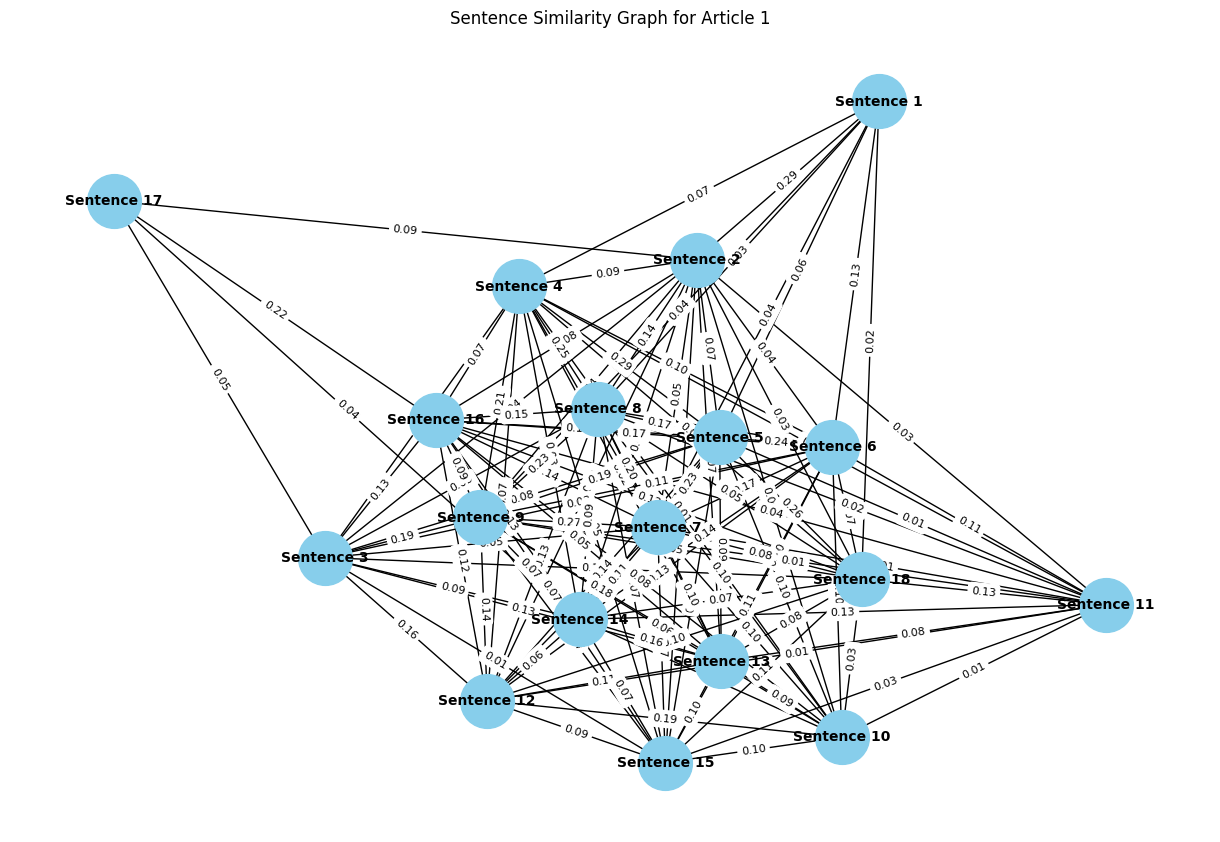

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def construct_sentence_graph(similarity_matrix, sentences, article_snippet, example_index):
    similarity_matrix = np.array(similarity_matrix)
    graph = nx.Graph()

    print(f"\nArticle {example_index} - Snippet: {article_snippet}")
    print("Sentences:")
    for i, sentence in enumerate(sentences):
        print(f"Sentence {i+1}: {sentence}")
        graph.add_node(f"Sentence {i+1}", label=sentence)

    # Add edges with weights from the similarity matrix
    num_sentences = len(sentences)
    for i in range(num_sentences):
        for j in range(i+1, num_sentences):
            if similarity_matrix[i][j] > 0:
                graph.add_edge(f"Sentence {i+1}", f"Sentence {j+1}", weight=similarity_matrix[i][j])

    # Visualize the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, font_weight='bold')

    edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

    print(f"\nShowing Similarity Graph for Article {example_index}")
    plt.title(f"Sentence Similarity Graph for Article {example_index}")
    plt.show()
    return graph

# Example to apply on one row
example_index = 1
article_snippet = df.iloc[example_index]['Article'][:50] + "..."
construct_sentence_graph(df.iloc[example_index]['Similarity_Matrix'],
                          df.iloc[example_index]['Split_Sentences'],
                          article_snippet,
                          example_index)


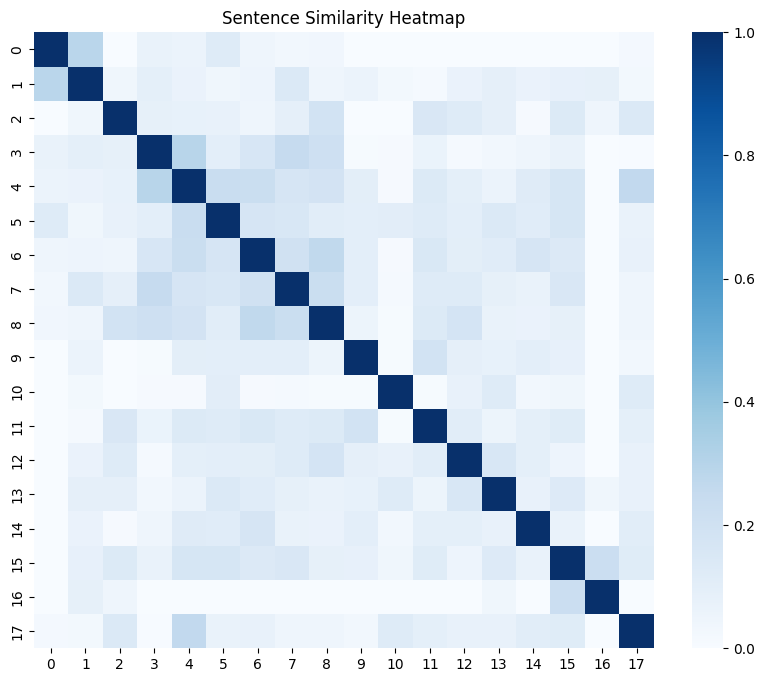

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_similarity_heatmap(matrix, sentences):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=False, cmap='Blues')
    plt.title("Sentence Similarity Heatmap")
    plt.show()

plot_similarity_heatmap(df['Similarity_Matrix'].iloc[1], df['Split_Sentences'].iloc[1])


In [ ]:
import networkx as nx

def rank_sentences(similarity_matrix, sentences):
    graph = nx.from_numpy_array(np.array(similarity_matrix))
    scores = nx.pagerank(graph)
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    return ranked_sentences

df['Ranked_Sentences'] = df.apply(lambda x: rank_sentences(x['Similarity_Matrix'], x['Split_Sentences']), axis=1)
print(df['Ranked_Sentences'].head())


0    [(0.06341955781977926, "they know that when th...
1    [(0.06959882783601752, he said to media repres...
2    [(0.059649953520524227, the archbishop of cant...
3    [(0.05334973053520504, "it is not the case tha...
4    [(0.051376765642877076, the parties say they c...
Name: Ranked_Sentences, dtype: object


In [ ]:
def generate_summary(ranked_sentences, max_sentences_ratio=0.3, max_sentences_cap=10):
    num_sentences = min(int(len(ranked_sentences) * max_sentences_ratio), max_sentences_cap)
    num_sentences = max(1, num_sentences)

    # Select top-ranked sentences
    summary_sentences = [s[1] for s in ranked_sentences[:num_sentences]]

    # Join sentences to form the final summary
    summary = " ".join(summary_sentences)
    return summary

df['Summary'] = df['Ranked_Sentences'].apply(lambda x: generate_summary(x))
print(df[['Cleaned_Abbreviations', 'Summary']].head())


                               Cleaned_Abbreviations  \
0  student 'fee factor' played down\n\na rise has...   
1  mayor will not retract nazi jibe\n\nlondon may...   
2  royal couple watch nation's mood\n\nprince cha...   
3  concerns at school diploma plan\n\nfinal appea...   
4  campaign 'cold calls' questioned\n\nlabour and...   

                                             Summary  
0  "they know that when they take up their studie...  
1  he said to media representatives: "if you thin...  
2  the archbishop of canterbury said: "i am pleas...  
3  "it is not the case that the academic stream i...  
4  the parties say they can stick to the rules by...  


In [ ]:
# Display original text and summary for the first few articles
for i in range(3):
    print(f"\n **Original Article {i+1}:**")
    print(df['Cleaned_Abbreviations'].iloc[i])

    print(f"\n **Generated Summary {i+1}:**")
    print(df['Summary'].iloc[i])

    print("\n" + "-"*80)


 **Original Article 1:**
student 'fee factor' played down

a rise has been recorded in the number of students from south of the border applying to universities in scotland.

however, lifelong learning minister jim wallace said that this would not result in scottish students missing out. applications from england and wales rose by 17% between january 2005 and the previous year, up 23,600 to 27,700. fears had been expressed that a flood of "fee refugees" would try to avoid top-up fees of up to £3,000 a year being introduced in england. in june last year, mr wallace announced proposals to increase tuition fees for english students studying in scotland by £2,000 in an attempt to prevent a cross-border flood, although no figure has yet been agreed. legislation to introduce the top-up fees in england is not due to take effect until autumn 2006 and students who start before then will not have to pay additional fees at all.

the figures were made public on thursday by admissions service ucas.

In [ ]:
print(df.columns)

Index(['Article_Number', 'Category', 'Article', 'Summary', 'Lowercased',
       'Cleaned_Abbreviations', 'Split_Sentences', 'Similarity_Matrix',
       'Ranked_Sentences'],
      dtype='object')


In [ ]:
df[['Article_Number', 'Cleaned_Abbreviations', 'Summary']].to_csv('generated_summaries.csv', index=False)
print("Summaries saved to generated_summaries.csv!")


Summaries saved to generated_summaries.csv!


In [ ]:
print(df.columns)


Index(['Article_Number', 'Category', 'Article', 'Summary', 'Lowercased',
       'Cleaned_Abbreviations', 'Split_Sentences', 'Similarity_Matrix',
       'Ranked_Sentences'],
      dtype='object')


In [ ]:
import os
import pandas as pd
import kagglehub

dataset_path = kagglehub.dataset_download("pariza/bbc-news-summary")

news_summaries_dir = os.path.join(dataset_path, "bbc news summary", "BBC News Summary", "Summaries")

if not os.path.exists(news_summaries_dir):
    raise FileNotFoundError(f"News Summaries directory not found at {news_summaries_dir}")

summary_data = []
article_number = 1

for category in os.listdir(news_summaries_dir):
    category_path = os.path.join(news_summaries_dir, category)

    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)

            try:
                with open(file_path, "r", encoding="utf-8") as file:
                    summary_text = file.read().strip()
            except UnicodeDecodeError:
                with open(file_path, "r", encoding="ISO-8859-1") as file:
                    summary_text = file.read().strip()

            summary_data.append([article_number, category, filename.replace('.txt', ''), summary_text])
            article_number += 1

summaries_df = pd.DataFrame(summary_data, columns=["Article_Number", "Category", "Article", "Original_Summary"])

summaries_df.to_csv("bbc_news_summaries_only.csv", index=False, encoding="utf-8")

print("Summaries saved to 'bbc_news_summaries_only.csv'.")
print(summaries_df.head())


Summaries saved to 'bbc_news_summaries_only.csv'.
   Article_Number  Category Article  \
0               1  politics     361   
1               2  politics     245   
2               3  politics     141   
3               4  politics     372   
4               5  politics     333   

                                    Original_Summary  
0  - Increase in the stamp duty threshold from £6...  
1  "They are very much not for the good and will ...  
2  Michael Howard has denied his shadow cabinet w...  
3  The report said individual registration should...  
4  UKIP's leader, Roger Knapman, has said he is g...  


In [ ]:
print(df.columns)

Index(['Article_Number', 'Category', 'Article', 'Summary', 'Lowercased',
       'Cleaned_Abbreviations', 'Split_Sentences', 'Similarity_Matrix',
       'Ranked_Sentences'],
      dtype='object')


In [ ]:
pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=29eaa459b01498dc7f34ae4d70ff9541bc113e9c7c7958e76035e1400e631079
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
import pandas as pd
from rouge_score import rouge_scorer

original_df = pd.read_csv("bbc_news_summaries_only.csv")

generated_df = pd.read_csv("generated_summaries.csv")

scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

rouge1_scores = []
rouge2_scores = []
rougeL_scores = []
generated_summaries = []

for _, row in original_df.iterrows():

    original_summary = row["Original_Summary"]


    generated_summary = generated_df.loc[generated_df["Article_Number"] == row["Article_Number"], "Summary"].values[0]


    generated_summaries.append(generated_summary)


    scores = scorer.score(original_summary, generated_summary)

    rouge1_scores.append(scores["rouge1"].fmeasure)
    rouge2_scores.append(scores["rouge2"].fmeasure)
    rougeL_scores.append(scores["rougeL"].fmeasure)

original_df["Generated_Summary"] = generated_summaries
original_df["ROUGE-1"] = rouge1_scores
original_df["ROUGE-2"] = rouge2_scores
original_df["ROUGE-L"] = rougeL_scores

original_df.to_csv("bbc_news_with_rouge_scores_and_generated_summary.csv", index=False)

print(original_df[['Article_Number', 'Generated_Summary', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']].head())


   Article_Number                                  Generated_Summary  \
0               1  "they know that when they take up their studie...   
1               2  he said to media representatives: "if you thin...   
2               3  the archbishop of canterbury said: "i am pleas...   
3               4  "it is not the case that the academic stream i...   
4               5  the parties say they can stick to the rules by...   

    ROUGE-1   ROUGE-2   ROUGE-L  
0  0.267030  0.038356  0.136240  
1  0.300211  0.038217  0.147992  
2  0.294840  0.044444  0.132678  
3  0.336323  0.094595  0.156951  
4  0.268949  0.034398  0.132029  


In [ ]:
# Check column names in both DataFrames
print("Generated DataFrame Columns:", generated_df.columns)
print("Original DataFrame Columns:", original_df.columns)


Generated DataFrame Columns: Index(['Article_Number', 'Cleaned_Abbreviations', 'Summary'], dtype='object')
Original DataFrame Columns: Index(['Article_Number', 'Category', 'Article', 'Original_Summary',
       'Generated_Summary', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L'],
      dtype='object')


In [ ]:
import pandas as pd
from rouge_score import rouge_scorer

# Load the new combined dataset with original summaries
original_df = pd.read_csv("bbc_news_articles_with_summaries.csv")

# Load generated summaries
generated_df = pd.read_csv("generated_summaries.csv")

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

# Lists to store scores and summaries
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []
generated_summaries = []

# Loop through each row and compute ROUGE scores
for _, row in original_df.iterrows():
    article_number = row["Article_Number"]
    original_summary = row["Summary"]  # From the combined CSV

    # Get generated summary for the same article
    matched_row = generated_df[generated_df["Article_Number"] == article_number]

    if not matched_row.empty:
        generated_summary = matched_row["Summary"].values[0]
    else:
        generated_summary = ""

    generated_summaries.append(generated_summary)

    # Compute ROUGE scores
    scores = scorer.score(original_summary, generated_summary)

    rouge1_scores.append(scores["rouge1"].fmeasure)
    rouge2_scores.append(scores["rouge2"].fmeasure)
    rougeL_scores.append(scores["rougeL"].fmeasure)

# Add results to DataFrame
original_df["Generated_Summary"] = generated_summaries
original_df["ROUGE-1"] = rouge1_scores
original_df["ROUGE-2"] = rouge2_scores
original_df["ROUGE-L"] = rougeL_scores

# Save results
original_df.to_csv("bbc_news_with_rouge_scores_and_generated_summary.csv", index=False)

# Print a preview
print(original_df[['Article_Number', 'Generated_Summary', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']].head())


   Article_Number                                  Generated_Summary  \
0               1  "they know that when they take up their studie...   
1               2  he said to media representatives: "if you thin...   
2               3  the archbishop of canterbury said: "i am pleas...   
3               4  "it is not the case that the academic stream i...   
4               5  the parties say they can stick to the rules by...   

    ROUGE-1   ROUGE-2   ROUGE-L  
0  0.541353  0.332494  0.360902  
1  0.557789  0.308081  0.306533  
2  0.531073  0.369318  0.361582  
3  0.502370  0.252381  0.298578  
4  0.722449  0.602459  0.363265  


In [ ]:
# import re
# import numpy as np
# import networkx as nx
# from sklearn.feature_extraction.text import TfidfVectorizer

# def summarize(text, model_type="textrank"):  # Added model_type parameter
#     """
#     Generates a summary of the given text using TextRank algorithm.

#     Args:
#         text (str): The input text to summarize.
#         model_type (str, optional): The type of summarization model to use.
#             Currently only "textrank" is supported. Defaults to "textrank".

#     Returns:
#         str: The generated summary.
#     """
#     if model_type == "textrank":  # Check if model_type is "textrank"
#         cleaned_text = clean_text(text)  # Preprocess the text
#         sentences = split_into_sentences(cleaned_text)  # Split into sentences
#         similarity_matrix = compute_similarity(sentences)  # Calculate similarity
#         ranked_sentences = rank_sentences(similarity_matrix, sentences)  # Rank sentences
#         summary = generate_summary(ranked_sentences)  # Generate summary
#         return summary  # Return the generated summary
#     else:
#         raise ValueError(f"Unsupported model_type: {model_type}")

Enter your article: India’s space research journey is a remarkable story of innovation, determination, and self-reliance. The Indian Space Research Organisation (ISRO), established in 1969, is the backbone of India’s space program. From launching simple satellites to exploring the Moon and Mars, ISRO has made India a global leader in space science.  India’s first satellite, Aryabhata, was launched in 1975 with help from the Soviet Union. Since then, ISRO has developed a strong indigenous space capability. A major breakthrough came with the launch of PSLV (Polar Satellite Launch Vehicle), which proved to be a reliable and cost-effective vehicle for placing satellites in orbit. The PSLV has been used to launch hundreds of satellites, including those for other countries.  One of the most significant achievements was the Chandrayaan-1 mission in 2008, which confirmed the presence of water on the Moon. Later, the Mars Orbiter Mission (Mangalyaan) in 2013 made India the first Asian country t

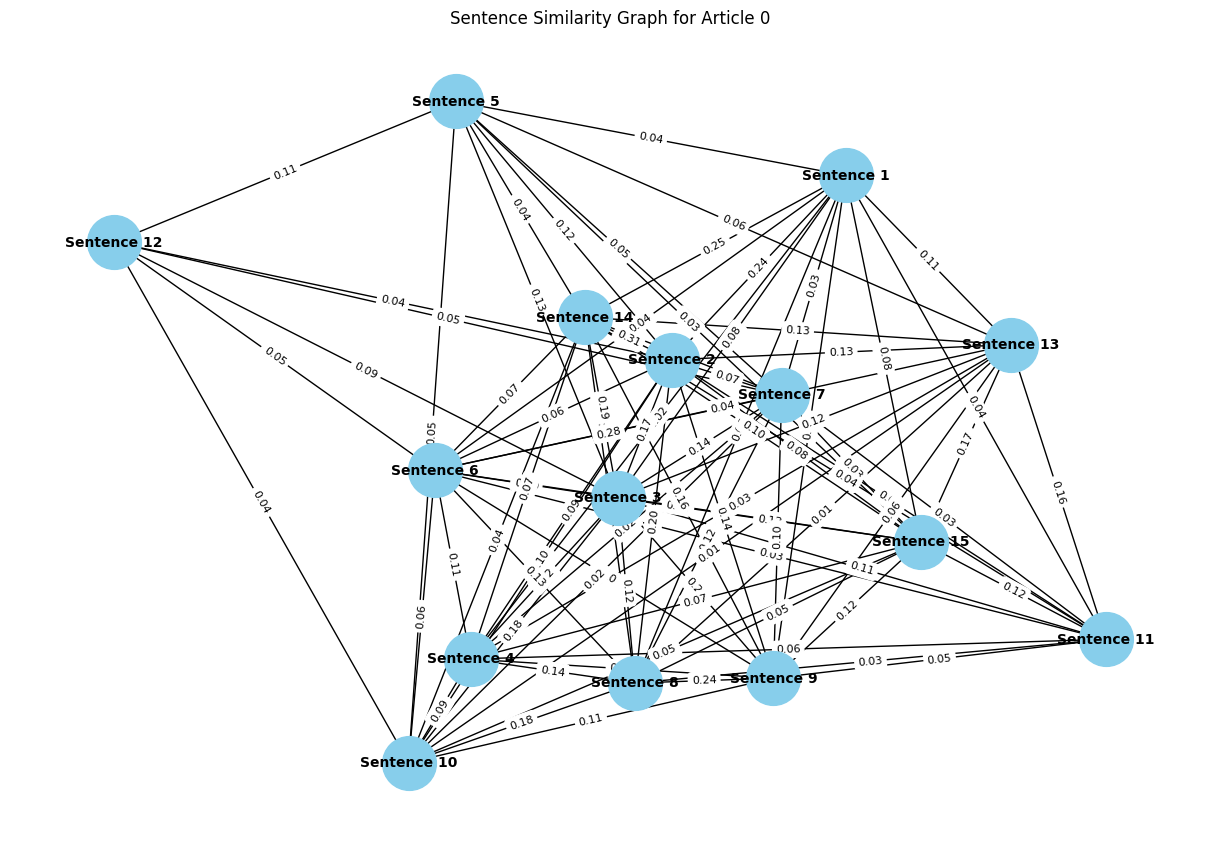


Generated Summary:
 From launching simple satellites to exploring the Moon and Mars, ISRO has made India a global leader in space science. The Indian Space Research Organisation (ISRO), established in 1969, is the backbone of India’s space program. In conclusion, India’s space research is a symbol of the country’s scientific excellence and global ambition. Later, the Mars Orbiter Mission (Mangalyaan) in 2013 made India the first Asian country to reach Mars and the first in the world to do so on its maiden attempt.


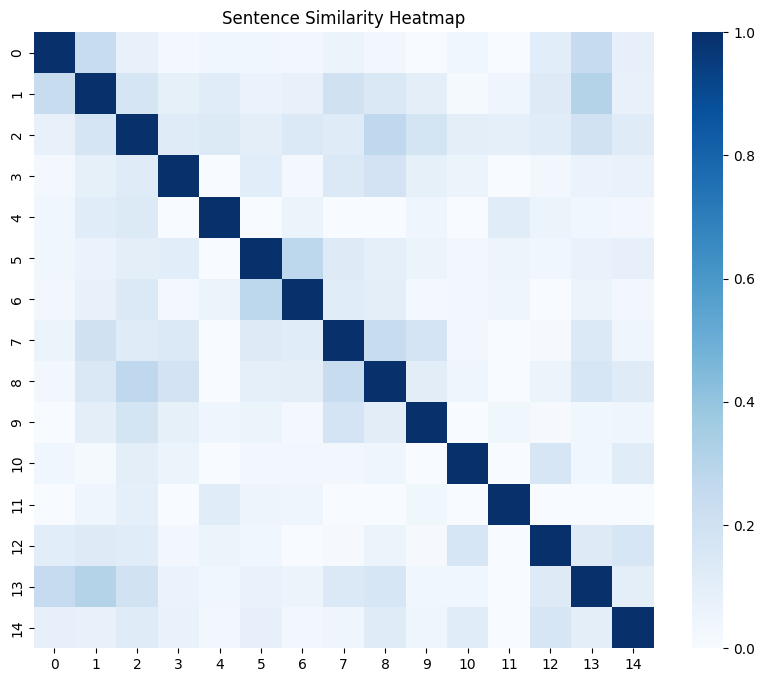

In [ ]:
import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

def process_article(article_text):
    cleaned_text = clean_text(article_text)
    sentences = split_into_sentences(cleaned_text)
    similarity_matrix = compute_similarity(sentences)
    article_snippet = article_text[:200]  # First 200 characters
    example_index = 0  # Default index
    sentence_graph = construct_sentence_graph(similarity_matrix, sentences, article_snippet, example_index)
    ranked_sentences = rank_sentences(similarity_matrix, sentences)
    summary = generate_summary(ranked_sentences)
    return sentences, similarity_matrix, ranked_sentences, summary

def plot_sentence_importance(ranked_sentences):
    scores, sentences = zip(*ranked_sentences)
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sentences)), scores, color='skyblue')
    plt.yticks(range(len(sentences)), sentences, fontsize=8)
    plt.xlabel("Importance Score")
    plt.ylabel("Sentences")
    plt.title("Sentence Importance Based on PageRank")
    plt.gca().invert_yaxis()
    plt.show()


# User Input
article_text = input("Enter your article: ")

# Processing
sentences, similarity_matrix, ranked_sentences, summary = process_article(article_text)

# Output Results
print("\nGenerated Summary:\n", summary)
plot_similarity_heatmap(similarity_matrix, sentences)
